# **IMPORTAÇÃO DOS DADOS**

In [ ]:
# prompt: usando python, crie um código para ler o arquivo dadosabertos (1).csv aqui do colab
import pandas as pd

# Ler o arquivo CSV
df = pd.read_csv("dadosabertos (1).csv", encoding="latin1", sep=";")

# Imprimir o DataFrame
print(df)

        Unnamed: 0 Data de atendimento no Serviço IDADE SEXO  \
0                0            2020-03-26 00:00:00    68    F   
1                1            2020-03-23 00:00:00    38    M   
2                2            2020-04-06 00:00:00    35    M   
3                3            2020-04-11 00:00:00    57    M   
4                4            2020-04-27 00:00:00    60    M   
...            ...                            ...   ...  ...   
335566      335566                     2023-01-03    51    F   
335567      335567                     2023-01-03    58    M   
335568      335568                     2023-01-03    67    M   
335569      335569                     2023-01-03    84    F   
335570      335570                     2022-12-12    35    F   

                    MUNICÍPIO  \
0                      MACEIÓ   
1                      MACEIÓ   
2                      MACEIÓ   
3                      MACEIÓ   
4                      MACEIÓ   
...                       ...   


<ipython-input-24-86ed3bc76f8c>:5: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dadosabertos (1).csv", encoding="latin1", sep=";")


In [ ]:
df.columns

Index(['Unnamed: 0', 'Data de atendimento no Serviço', 'IDADE', 'SEXO',
       'MUNICÍPIO',
       'CLASSIFICAÇÃO (Confirmado, suspeito, descartado, óbito, curado)',
       'Comorbidades',
       'Situação do paciente confirmado (UTI, isolamento domiciliar, enfermaria) ?',
       'Data do Óbito (Caso haja)', 'Data de confirmação', 'Unnamed: 15'],
      dtype='object')

# **TRATAMENTO DOS DADOS**

In [ ]:
df["Situação do paciente confirmado (UTI, isolamento domiciliar, enfermaria) ?"].unique()

array(['RECUPERADO', 'ÓBITO', 'HOSPITALIZADO', 'Hospitalizado',
       'ÓBITO POR OUTRAS CAUSAS', 'ISOLAMENTO DOMICILIAR', 'óbITO'],
      dtype=object)

In [ ]:
# padronizando o hospitalizado

df["Situação do paciente confirmado (UTI, isolamento domiciliar, enfermaria) ?"] = df["Situação do paciente confirmado (UTI, isolamento domiciliar, enfermaria) ?"].replace(["Hospitalizado"], "HOSPITALIZADO")

In [ ]:
# prompt: crie um código que substitua todos os valores "óbITO" e 'ÓBITO POR OUTRAS CAUSAS' por 'ÓBITO' na coluna df["Situação do paciente confirmado (UTI, isolamento domiciliar, enfermaria) ?"]

df["Situação do paciente confirmado (UTI, isolamento domiciliar, enfermaria) ?"] = df["Situação do paciente confirmado (UTI, isolamento domiciliar, enfermaria) ?"].replace(["óbITO", "ÓBITO POR OUTRAS CAUSAS"], "ÓBITO")


In [ ]:
# prompt: na coluna df["'Data de confirmação'"] ajuste os dados para o formato de data

df["Data de confirmação"] = pd.to_datetime(df["Data de confirmação"])


In [ ]:
# prompt: ordene todos os dados de df, do menor para o maior, baseado na coluna df["Data de confirmação"]

df.sort_values(by="Data de confirmação", inplace=True)

In [ ]:
df['Data de confirmação']

5        2020-03-08
92       2020-03-16
6        2020-03-18
7        2020-03-18
8        2020-03-18
            ...    
335482   2023-01-03
335481   2023-01-03
335480   2023-01-03
335478   2023-01-03
335570   2023-01-03
Name: Data de confirmação, Length: 335571, dtype: datetime64[ns]

# **CONSULTA DOS DADOS**

In [ ]:
# prompt: crie um código que agrupe os dados de df pelo valor "MACEIÓ" no atributo "MUNICÍPIO"
df_maceio = df[df["MUNICÍPIO"] == "MACEIÓ"]

# Imprimir o DataFrame filtrado
print(df_maceio)


        Unnamed: 0 Data de atendimento no Serviço IDADE SEXO MUNICÍPIO  \
5                5            2020-03-04 00:00:00    42    M    MACEIÓ   
92              92            2020-03-13 00:00:00    36    M    MACEIÓ   
6                6            2020-03-14 00:00:00    21    M    MACEIÓ   
7                7            2020-03-14 00:00:00    25    F    MACEIÓ   
8                8            2020-03-14 00:00:00    44    F    MACEIÓ   
...            ...                            ...   ...  ...       ...   
335472      335472                     2021-01-24    22    M    MACEIÓ   
335457      335457                     2023-01-02    42    M    MACEIÓ   
335454      335454                     2023-01-01    61    F    MACEIÓ   
335452      335452                     2023-01-02    40    M    MACEIÓ   
335503      335503                     2023-01-02    89    M    MACEIÓ   

       CLASSIFICAÇÃO (Confirmado, suspeito, descartado, óbito, curado)  \
5                                    

In [ ]:
# prompt: usando o dataframe df_maceio separe os dados pelo valor "CONFIRMADO" na coluna "CLASSIFICAÇÃO (Confirmado, suspeito, descartado, óbito, curado)  \"
df_maceio_confirmado = df_maceio[df_maceio["CLASSIFICAÇÃO (Confirmado, suspeito, descartado, óbito, curado)"] == "CONFIRMADO"]

# Imprimir o DataFrame filtrado
print(df_maceio_confirmado)


        Unnamed: 0 Data de atendimento no Serviço IDADE SEXO MUNICÍPIO  \
5                5            2020-03-04 00:00:00    42    M    MACEIÓ   
92              92            2020-03-13 00:00:00    36    M    MACEIÓ   
6                6            2020-03-14 00:00:00    21    M    MACEIÓ   
7                7            2020-03-14 00:00:00    25    F    MACEIÓ   
8                8            2020-03-14 00:00:00    44    F    MACEIÓ   
...            ...                            ...   ...  ...       ...   
335472      335472                     2021-01-24    22    M    MACEIÓ   
335457      335457                     2023-01-02    42    M    MACEIÓ   
335454      335454                     2023-01-01    61    F    MACEIÓ   
335452      335452                     2023-01-02    40    M    MACEIÓ   
335503      335503                     2023-01-02    89    M    MACEIÓ   

       CLASSIFICAÇÃO (Confirmado, suspeito, descartado, óbito, curado)  \
5                                    

In [ ]:
df_maceio_confirmado.head(5)

,Unnamed: 0,Data de atendimento no Serviço,IDADE,SEXO,MUNICÍPIO,"CLASSIFICAÇÃO (Confirmado, suspeito, descartado, óbito, curado)",Comorbidades,"Situação do paciente confirmado (UTI, isolamento domiciliar, enfermaria) ?",Data do Óbito (Caso haja),Data de confirmação,Unnamed: 15
5,5,2020-03-04 00:00:00,42,M,MACEIÓ,CONFIRMADO,NaN,RECUPERADO,NaN,2020-03-08,NaN
92,92,2020-03-13 00:00:00,36,M,MACEIÓ,CONFIRMADO,NaN,RECUPERADO,NaN,2020-03-16,NaN
6,6,2020-03-14 00:00:00,21,M,MACEIÓ,CONFIRMADO,NaN,RECUPERADO,NaN,2020-03-18,NaN
7,7,2020-03-14 00:00:00,25,F,MACEIÓ,CONFIRMADO,NaN,RECUPERADO,NaN,2020-03-18,NaN
8,8,2020-03-14 00:00:00,44,F,MACEIÓ,CONFIRMADO,HAS,RECUPERADO,NaN,2020-03-18,NaN


In [ ]:
# prompt: conte a quantidade de elementos pelo atributo 'Data de confirmação'

serie = df_maceio_confirmado['Data de confirmação'].value_counts()
serie

2022-02-03    2621
2022-02-08    2191
2022-01-27    1661
2022-01-31    1345
2022-02-15    1326
              ... 
2022-10-07       1
2022-10-03       1
2021-12-18       1
2022-09-16       1
2020-03-08       1
Name: Data de confirmação, Length: 1005, dtype: int64

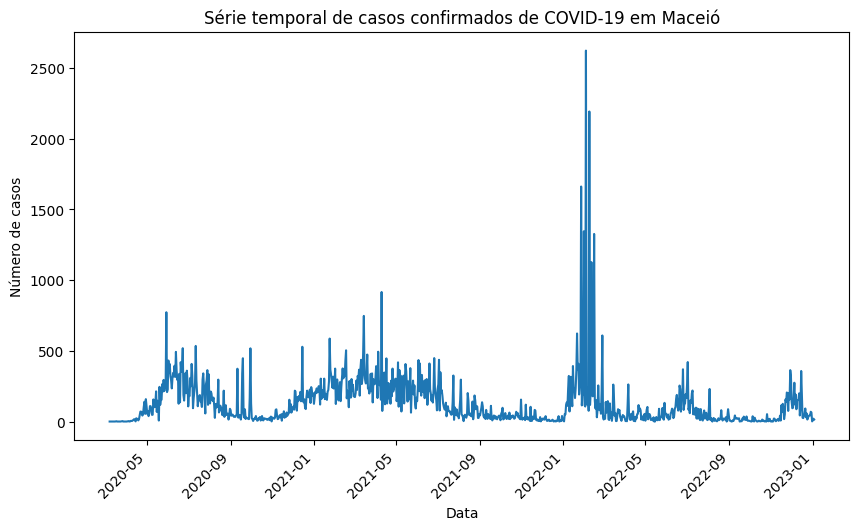

In [ ]:
# prompt: crie um plot da serie temporal de serie

import matplotlib.pyplot as plt

serie.plot(figsize=(10, 6))
plt.title('Série temporal de casos confirmados de COVID-19 em Maceió')
plt.xlabel('Data')
plt.ylabel('Número de casos')
plt.xticks(rotation=45)
plt.show()


# **METODO PARA GERAR AS SERIES**

In [ ]:
def gerarSerie(baseDados, classificação, nomeCidade):

  if(nomeCidade == 'ALAGOAS'):
    df_cidade = baseDados
  else:
    # capturando os dados por municipio
    df_cidade = baseDados[baseDados["MUNICÍPIO"] == nomeCidade]

  if(classificação == 'TODOS'):
  # capturando apenas os dados dos confirmados
    df_confirmados = df_cidade[df_cidade["CLASSIFICAÇÃO (Confirmado, suspeito, descartado, óbito, curado)"] == 'CONFIRMADO']
  else:
    df_confirmados = df_cidade[df_cidade["Situação do paciente confirmado (UTI, isolamento domiciliar, enfermaria) ?"] == classificação]

  # contando a quantidade de confirmados por dia
  serie = df_confirmados['Data de confirmação'].value_counts()

  # retornando a serie
  return serie

In [ ]:
def plotarSerie(serie):

  serie.plot(figsize=(10, 6))
  plt.title('Série temporal de casos confirmados de COVID-19')
  plt.xlabel('Data')
  plt.ylabel('Número de casos')
  plt.xticks(rotation=45)
  plt.show()

# **OPÇÕES DE PARÂMETROS**

**Cidades existentes**

In [ ]:
# prompt: apresente os valores únicos da coluna 'CLASSIFICAÇÃO (Confirmado, suspeito, descartado, óbito, curado)'
# Get unique values in the 'CLASSIFICAÇÃO (Confirmado, suspeito, descartado, óbito, curado)' column
unique_classificacoes = df['MUNICÍPIO'].unique()

# Print the unique values
print(unique_classificacoes)

['MACEIÓ' 'PORTO REAL DO COLÉGIO' 'MARECHAL DEODORO' 'PALMEIRA DOS ÍNDIOS'
 'SATUBA' 'RIO LARGO' 'BOCA DA MATA' 'UNIÃO DOS PALMARES' 'ARAPIRACA'
 'SÃO MIGUEL DOS MILAGRES' 'VIÇOSA' 'MURICI' 'IBATEGUARA' 'PILAR'
 'MARIBONDO' 'CAPELA' 'BARRA DE SANTO ANTÔNIO' 'PARIPUEIRA' 'ANADIA'
 'LIMOEIRO DE ANADIA' 'SANTA LUZIA DO NORTE' 'DELMIRO GOUVEIA' 'PIAÇABUÇU'
 'SÃO MIGUEL DOS CAMPOS' 'MARAGOGI' "OLHO D'ÁGUA DAS FLORES"
 'SÃO SEBASTIÃO' 'PORTO CALVO' 'ATALAIA' 'MATRIZ DE CAMARAGIBE'
 'BARRA DE SÃO MIGUEL' 'PENEDO' 'JUNQUEIRO' 'PAULO JACINTO' 'PALESTINA'
 'BATALHA' 'LAGOA DA CANOA' 'BRANQUINHA' 'CORURIPE' 'CAMPO ALEGRE'
 'NOVO LINO' 'TAQUARANA' 'COLÔNIA LEOPOLDINA' 'JOAQUIM GOMES'
 'SANTANA DO IPANEMA' 'COQUEIRO SECO' 'TEOTÔNIO VILELA' 'JEQUIÁ DA PRAIA'
 'JARAMATAIA' 'MESSIAS' 'SÃO JOSÉ DA LAJE' 'JACUÍPE' 'CAMPO GRANDE'
 'CAMPESTRE' 'INHAPI' 'FLEXEIRAS' 'SÃO LUÍS DO QUITUNDE' 'CANAPI'
 'MAJOR ISIDORO' 'OLIVENÇA' 'CRAÍBAS' 'CACIMBINHAS' 'POÇO DAS TRINCHEIRAS'
 'PINDOBA' 'JAPARATINGA' 'CAJUEIRO' 

**Classificações existentes**

In [ ]:
df["CLASSIFICAÇÃO (Confirmado, suspeito, descartado, óbito, curado)"].unique()

array(['CONFIRMADO'], dtype=object)

In [ ]:
df["Situação do paciente confirmado (UTI, isolamento domiciliar, enfermaria) ?"].unique()

array(['RECUPERADO', 'ÓBITO', 'HOSPITALIZADO', 'ISOLAMENTO DOMICILIAR'],
      dtype=object)

# **GERANDO AS SERIES**

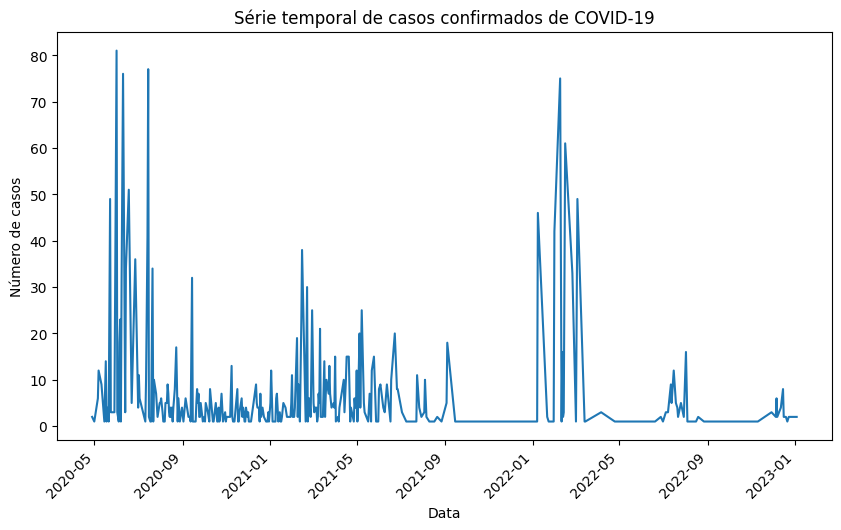

In [ ]:
# importando os dados da cidade
tipo = 'RECUPERADO'
cidade = 'CORURIPE'

# importando a serie
serie = gerarSerie(df, tipo, cidade)

# plotando a serie
plotarSerie(serie)

# **EXPORTAR A SÉRIE**

In [ ]:
# prompt: ordene os elementos da variavel serie baseado nas datas da primeira coluna
serie.sort_index(inplace=True)

In [ ]:
# prompt: usando o pandas, exporte a variável serie para csv
serie.to_csv("serie_"+cidade+"_"+tipo+".csv")

In [ ]:
serie_temporal = pd.read_csv("serie_"+cidade+"_"+tipo+".csv", sep = ",", encoding='latin')

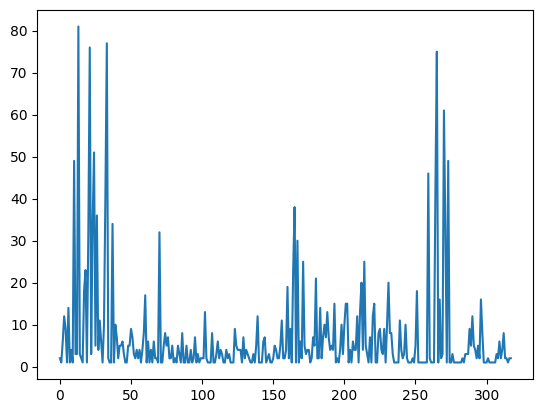

In [ ]:
plt.plot(serie_temporal['Data de confirmaÃ§Ã£o'])